In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [2]:
def read_df(path):
    try:
        all_sheets_dict = pd.read_excel(path, sheet_name=None)
        if not all_sheets_dict:
            print(f"Warning: The file '{path}' contains no sheets.")
            return pd.DataFrame()

        all_df = pd.concat(all_sheets_dict.values(), ignore_index=True)
        return all_df

    except ValueError as e:
        print(f"Error reading Excel file: {e}")
        return None
    except Exception as e:
        print(f"An unexpected error occurred: {e}")
        return None

In [3]:
path='/home/abd0g0m3aa/Documents/projects/InvestInMinds_Project2/merged.xlsx'
df=read_df(path)
df.head()

,State,Students Per Teacher,Overall Rank,Total Score,WalletLiteracy Score,Financial Planning & Habits Rank,Financial Knowledge & Education Rank
0,California,22.0,43.0,58.05,40.0,5.0,48.0
1,Nevada,20.0,41.0,58.39,46.0,31.0,39.0
2,Oregon,19.0,15.0,65.45,47.0,19.0,4.0
3,Louisiana,18.0,44.0,57.72,44.0,48.0,29.0
4,Idaho,18.0,28.0,63.06,39.0,20.0,22.0


In [4]:
df.dropna(inplace=True)

In [5]:
df.isna().sum()

State                                    0
Students Per Teacher                     0
Overall Rank                             0
Total Score                              0
WalletLiteracy Score                     0
Financial Planning & Habits Rank         0
Financial Knowledge & Education Rank     0
dtype: int64

In [6]:
df.shape

(49, 7)

In [7]:
from sklearn.preprocessing import StandardScaler
num=list(df.select_dtypes(include=np.number).columns)
scale=StandardScaler()
arr_scaled=scale.fit_transform(df[num])
df_scaled=pd.DataFrame(arr_scaled,columns=df[num].columns)
df_scaled['State']=df['State']
df_scaled=pd.get_dummies(df_scaled,drop_first=True)
df_scaled.head()


,Students Per Teacher,Overall Rank,Total Score,WalletLiteracy Score,Financial Planning & Habits Rank,Financial Knowledge & Education Rank,State_Alaska,State_Arizona,State_Arkansas,State_California,...,State_South Dakota,State_Tennessee,State_Texas,State_Utah,State_Vermont,State_Virginia,State_Washington,State_West Virginia,State_Wisconsin,State_Wyoming
0,2.985328,1.174212,-1.188989,0.927011,-1.424722,1.545685,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1,2.134857,1.039308,-1.105910,1.327806,0.320562,0.929925,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1.709621,-0.714438,0.619204,1.394606,-0.484953,-1.464701,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1.284385,1.241664,-1.269624,1.194208,1.461710,0.245746,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1.284385,0.162435,0.035206,0.860211,-0.417827,-0.233179,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
df_scaled.isna().sum()

Students Per Teacher                     0
Overall Rank                             0
Total Score                              0
WalletLiteracy Score                     0
Financial Planning & Habits Rank         0
Financial Knowledge & Education Rank     0
State_Alaska                             0
State_Arizona                            0
State_Arkansas                           0
State_California                         0
State_Colorado                           0
State_Connecticut                        0
State_Delaware                           0
State_Florida                            0
State_Georgia                            0
State_Hawaii                             0
State_Idaho                              0
State_Indiana                            0
State_Iowa                               0
State_Kansas                             0
State_Kentucky                           0
State_Louisiana                          0
State_Maryland                           0
State_Massa

In [9]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm


X = df_scaled.drop(num[2], axis=1)
y = df_scaled[num[2]]

In [10]:
results ={}


model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
mse = mean_squared_error(y, y_pred)
results['LinearRegression'] = mse


In [11]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2) 
X_poly = poly.fit_transform(X)
model = LinearRegression()
model.fit(X_poly, y)
y_pred = model.predict(X_poly)
mse = mean_squared_error(y, y_pred)
results['Polynomial Regression (degree 2)'] = mse

In [12]:
model = SGDRegressor()
model.fit(X, y)
y_pred = model.predict(X)
mse = mean_squared_error(y, y_pred)
results['SGDRegressor'] = mse


In [13]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X, y)
y_pred = model.predict(X)
mse = mean_squared_error(y, y_pred)
results['RandomForestRegressor'] = mse

In [14]:
for model_name, mse in results.items():
    print(f'{model_name}: MSE = {mse}')

LinearRegression: MSE = 1.10254871014772e-30
Polynomial Regression (degree 2): MSE = 1.38331971925809e-29
SGDRegressor: MSE = 0.026245898043664513
RandomForestRegressor: MSE = 0.007861439143315453


In [15]:
from joblib import dump
model_filename = "random_forest_model.joblib"
dump(model, model_filename)  

print(f"Random Forest model saved to {model_filename}")

Random Forest model saved to random_forest_model.joblib


In [16]:
feature_importances = model.feature_importances_
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print("Feature Importances:")
print(importance_df)

Feature Importances:
                                  Feature    Importance
1                           Overall Rank   9.699371e-01
3       Financial Planning & Habits Rank   1.260812e-02
0                    Students Per Teacher  4.752380e-03
27                          State_Montana  4.016854e-03
36                         State_Oklahoma  2.799438e-03
2                   WalletLiteracy Score   2.139013e-03
4   Financial Knowledge & Education Rank   1.912933e-03
46                         State_Virginia  4.157531e-04
7                          State_Arkansas  1.796605e-04
38                     State_Pennsylvania  1.758772e-04
10                      State_Connecticut  1.457944e-04
49                        State_Wisconsin  1.000213e-04
31                       State_New Mexico  9.482944e-05
29                           State_Nevada  9.343291e-05
14                           State_Hawaii  8.729308e-05
45                          State_Vermont  7.346708e-05
21                         

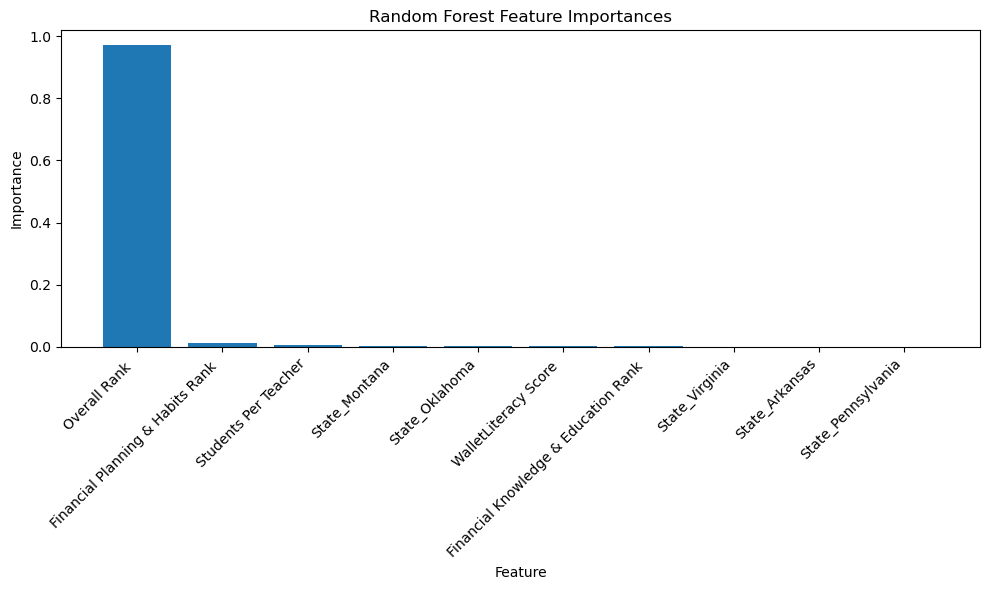

In [17]:
plt.figure(figsize=(10, 6))
plt.bar(importance_df['Feature'][:10], importance_df['Importance'][:10])
plt.xticks(rotation=45, ha='right')
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Random Forest Feature Importances")
plt.tight_layout()
plt.show()

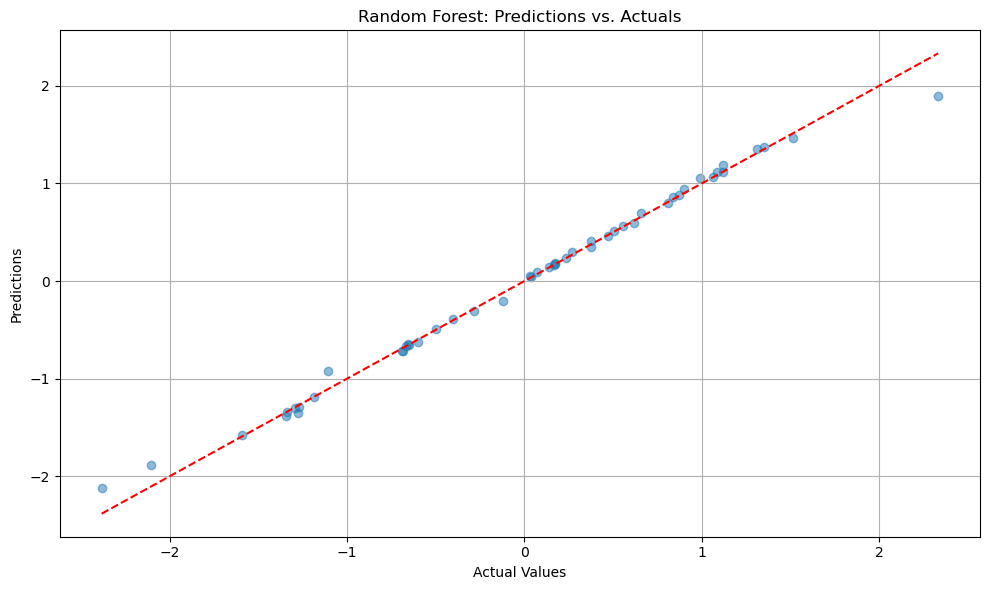

In [18]:
predictions = model.predict(X)

plt.figure(figsize=(10, 6))
plt.scatter(y, predictions, alpha=0.5) 
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Values")
plt.ylabel("Predictions")
plt.title("Random Forest: Predictions vs. Actuals")
plt.grid(True)
plt.tight_layout()
plt.show()

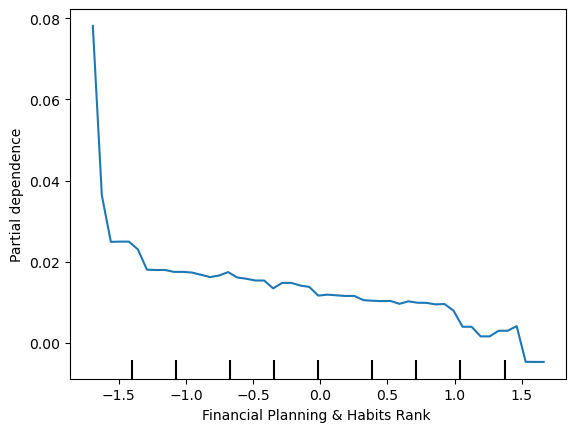

In [19]:
from sklearn.inspection import PartialDependenceDisplay
PartialDependenceDisplay.from_estimator(model, X, [num[4]])
plt.show()

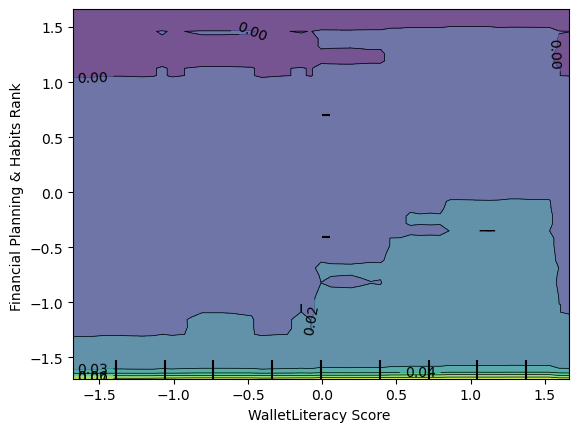

In [20]:
PartialDependenceDisplay.from_estimator(model, X, [num[3:5]])
plt.show()